# Movies Recommender 🍿 - Building a Content Based Recommendation System
A project proposal by **Adi Benziony (ID 313364549)**

## Introduction and Motivation
The film industry is a giant business, and every year thousands of new movies are made. In 2019 alone 4,693 new movies were released ([source](https://www.the-numbers.com/movies/production-countries#tab=year)).  
With all those new movies released each year it can be confusing to choose which movies to see, and that's where a personalized recommendation system can come in handy.

The growth in digital data volume that's at the disposal of big companies allowed a new era of personalized recommendation systems to arise.  
Every company serving consumers content wants to find a way to keep the consumer engaged and entertained, one of the ways this can be achived is by making it easier for the user to find content he will like.  
Companies like Spotify, Netflix, Twitter, Facebook and others all have recommendation systems to keep users on the platform.

![Netflix recommendations](resources/netflix-recommendations.png)

In this notebook we will use [The Movies Dataset](https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset) posted on Kaggle to build **a content based recommendation system for movies based on a user's ratings**.

## Dataset
This project is inspired by the dataset [The Movies Dataset](https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset) posted on Kaggle, featuring movies information like title, genres, release date and more along with users' movies ratings.  
The dataset is a combination of [_MovieLens_](https://movielens.org/) and [_TMDB_](https://www.themoviedb.org/).  
MovieLens is a research site run by _GroupLens Research_ at the University of Minnesota and contains users' movies ratings, and _TMDB_ is a website containing data on millions of movies.

Our dataset cotains:
* **45,000 movies** in various languages (but mostly English) with properties like budget, revenue, genres, language, release date, duration, and ratings.
* **26 million ratings by 260,000 users**

## Dataset Loading & Cleanup
We will start by loading `movies-dataset/movies_metadata.csv`.  
Note, the original CSV uploaded to Kaggle had some lines with unescaped newlines in their movie description fields, the CSV in the project's Git repository is a fixed version of the CSV from Kaggle.

Let's load the dataset and start inspecting it:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
movies_metadata = pd.read_csv('movies-dataset/movies_metadata.csv')
movies_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45463 entries, 0 to 45462
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45463 non-null  bool   
 1   belongs_to_collection  4491 non-null   object 
 2   budget                 45463 non-null  int64  
 3   genres                 45463 non-null  object 
 4   homepage               7779 non-null   object 
 5   id                     45463 non-null  int64  
 6   imdb_id                45446 non-null  object 
 7   original_language      45452 non-null  object 
 8   original_title         45463 non-null  object 
 9   overview               44509 non-null  object 
 10  popularity             45463 non-null  float64
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

We can see that the `release_date` field is not of type `datetime`, so let's change that:

In [3]:
movies_metadata = pd.read_csv('movies-dataset/movies_metadata.csv', parse_dates=['release_date'])

# Data Exploration

Now for some exploration, let's look at some rows of our dataset:

In [4]:
movies_metadata.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173


We need to know who's our recommendation system will cater to, this will depend on how much our dataset is skwed.  
So let's look at some basic statistics of language, budget, revenu, release dates, duration, votes count and genres.

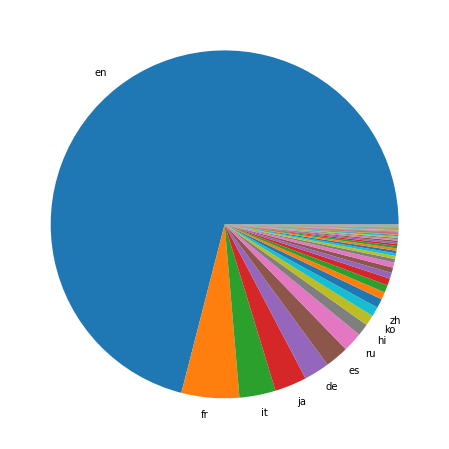

In [5]:
lng_counts = movies_metadata['original_language'].value_counts()

top_lng = lng_counts.index.tolist()[:10]
labels = top_lng + [""]*(lng_counts.index.size - 10)
plt.figure(figsize=(8, 8))
plt.pie(lng_counts, labels=labels)

plt.show()

English is the most dominent language in our dataset, while there's also French, Italian, Japanease, German, Spanish, Russian and more.

Let's look at statistics about the release dates and the duration:

Most of the movies in the dataset doesn't have budget or revenue specified, so we'll try to understand the distribution of those that do:

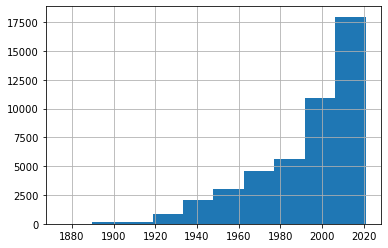

In [6]:
movies_metadata['release_date'].hist()
plt.show()

We can see that our dataset has much more movies from recent years.

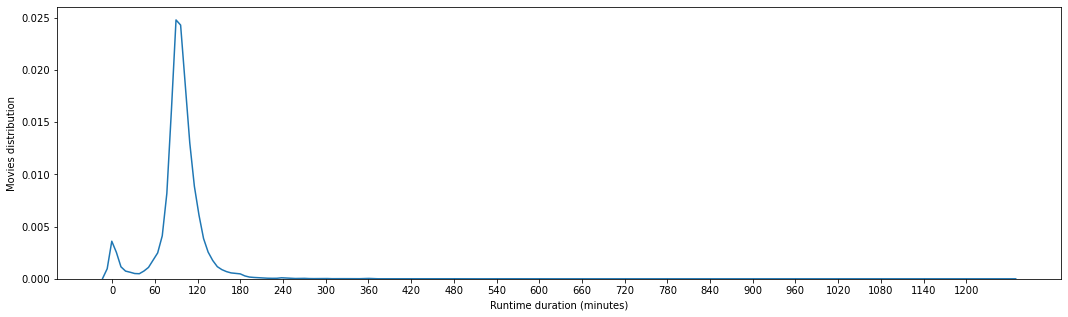

In [7]:
plt.figure(figsize=(18,5))
runtimes = movies_metadata['runtime']
sns.kdeplot(runtimes)
plt.xticks(np.arange(min(runtimes), max(runtimes), 60))  # Show ticks every hour
plt.xlabel("Runtime duration (minutes)")
plt.ylabel("Movies distribution")
plt.show()

The average duration is a little more than an hour and a half, and most movies are between an hour and 2 hours.

Next, let's take a look at the different genres.

The first step is to make the genres data usable. Currently the genres of each movie is stored as follows:

In [8]:
movies_metadata[movies_metadata['title'] == 'Toy Story'][['title', 'genres']]

,title,genres
0,Toy Story,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '..."


So we'll create a new `DataFrame` that will have a duplicate of each movie per its genre:

In [9]:
import json

movie_metadata_tmp = movies_metadata.copy()
movie_metadata_tmp["genre"] = np.nan

new_rows = []

for index, movie_metadata in movie_metadata_tmp.iterrows():
    movie_genres_details = json.loads(movie_metadata["genres"].replace('\'', '"'))
    movie_genres = [x["name"] for x in movie_genres_details]
    for movie_genre in movie_genres:
        movie_metadata["genre"] = movie_genre
        new_rows.append(movie_metadata.to_list())

movies_genres = pd.DataFrame(data=new_rows, columns=movie_metadata_tmp.columns)

And `movies_genres` will store movies' genres as follows:

In [10]:
movies_genres[movies_genres['title'] == 'Toy Story'][['title', 'genre']]

,title,genre
0,Toy Story,Animation
1,Toy Story,Comedy
2,Toy Story,Family


We have the following genres:

In [11]:
genres = movies_genres['genre'].unique()
pd.DataFrame(genres)

,0
0,Animation
1,Comedy
2,Family
3,Adventure
4,Fantasy
5,Romance
6,Drama
7,Action
8,Crime
9,Thriller


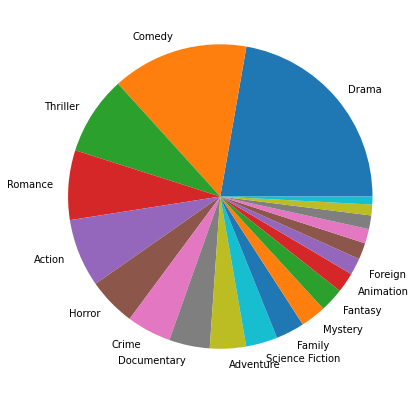

In [12]:
genres_count = movies_genres['genre'].value_counts()
top_genres = genres_count.index.tolist()[:15]
labels = top_genres + [""]*(genres_count.index.size - 15)
plt.figure(figsize=(7, 7))
a = plt.pie(genres_count, labels=labels)

It's clear that most movies produced are categorized as "Drama", "Comedy", "Thriller", "Romance", or "Action".

It will be interesting to see how different movie properties change based on genre. We'll keep it in mind going forward in this notebook.

Next, let's take a look at movies' votes

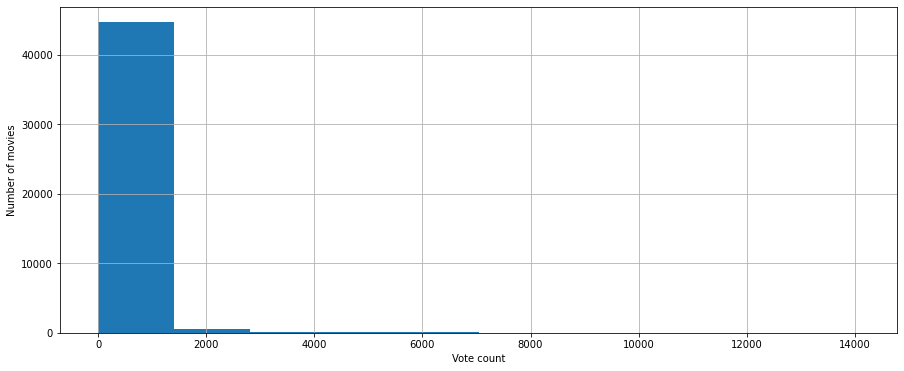

In [13]:
plt.figure(figsize=(15, 6))
movies_metadata['vote_count'].hist()
plt.xlabel("Vote count")
plt.ylabel("Number of movies")
plt.show()

<AxesSubplot:>

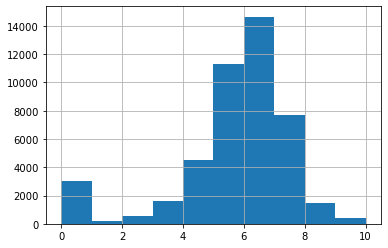

In [14]:
movies_metadata['vote_average'].hist()

In [15]:
movies_metadata_with_budget = movies_metadata[movies_metadata['budget'] > 1000]
movies_metadata_with_revenue = movies_metadata[movies_metadata['revenue'] > 1000]

print(f'Movies with budget specified: {movies_metadata_with_budget.shape[0]:,}')
print(f'Movies with revenue specified: {movies_metadata_with_revenue.shape[0]:,}')

Movies with budget specified: 8,642
Movies with revenue specified: 7,253


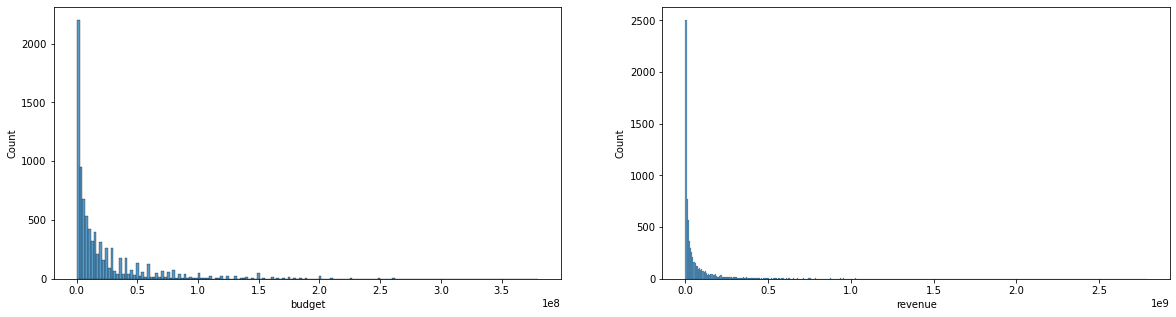

The average movie budget is: 22,224,251$
The average movie revenue is: 56,215,669$


In [16]:
figs, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
sns.histplot(movies_metadata_with_budget['budget'], ax=axis[0])
sns.histplot(movies_metadata_with_revenue['revenue'], ax=axis[1])

plt.show()

budget_avg = movies_metadata_with_budget['budget'].mean()
revenue_avg = movies_metadata_with_budget['revenue'].mean()
print(f'The average movie budget is: {int(budget_avg):,}$')
print(f'The average movie revenue is: {int(revenue_avg):,}$')

## Dataset Clean Up
The `movies_metadata.csv` had some movies with newlines in their movie description, so it needed to be fixed, the updated CSV file can be found at the Git repository.

## Basic Data Visualization

## Finding Correlations

In [17]:
movies_with_revenue = movies_metadata[movies_metadata['revenue'] > 0]
movies_with_revenue = movies_metadata[movies_metadata['budget'] > 0]
movies_with_revenue = movies_with_revenue.sort_values('budget')

<AxesSubplot:xlabel='budget'>

<Figure size 1440x720 with 0 Axes>

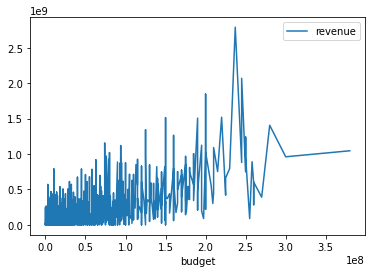

In [18]:
b = movies_with_revenue[["budget", "revenue"]]
b=b.set_index("budget")
plt.figure(figsize=(20, 10))
b.plot()

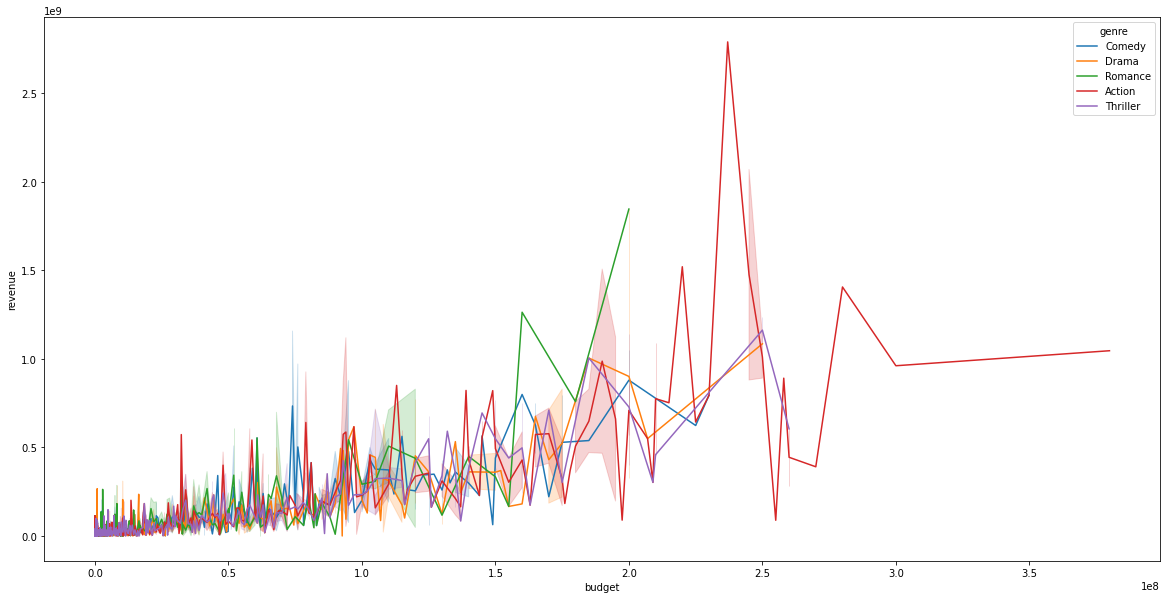

In [19]:
a = movies_genres[['budget', 'revenue', 'genre']]
a = a[a['genre'].isin(top_genres[:5])]
# a = a.astype({'budget': int, 'revenue':int}, errors='ignore')
a = a[a['revenue'] > 0]
a = a[a['budget'] > 0]

# a.groupby('genre')
# a = a.sort_values('budget')
# a.set_index('budget', inplace=True)
plt.figure(figsize=(20, 10))
# a.groupby('genre')['revenue'].plot(legend='true')

# sns.displot(data=a, x='budget', hue='genre', y='revenue', kind='kde')
sns.lineplot(data=a,  x='budget', hue='genre', y='revenue')
plt.show()

In [20]:
import json

movie_metadata_tmp = movies_metadata.copy()
movie_metadata_tmp["genre"] = np.nan

new_rows = []

for index, movie_metadata in movie_metadata_tmp.iterrows():
    movie_genres_details = json.loads(movie_metadata["genres"].replace('\'', '"'))
    movie_genres = [x["name"] for x in movie_genres_details]
    for movie_genre in movie_genres:
        movie_metadata["genre"] = movie_genre
        new_rows.append(movie_metadata.to_list())

c = pd.DataFrame(data=new_rows, columns=movie_metadata_tmp.columns)

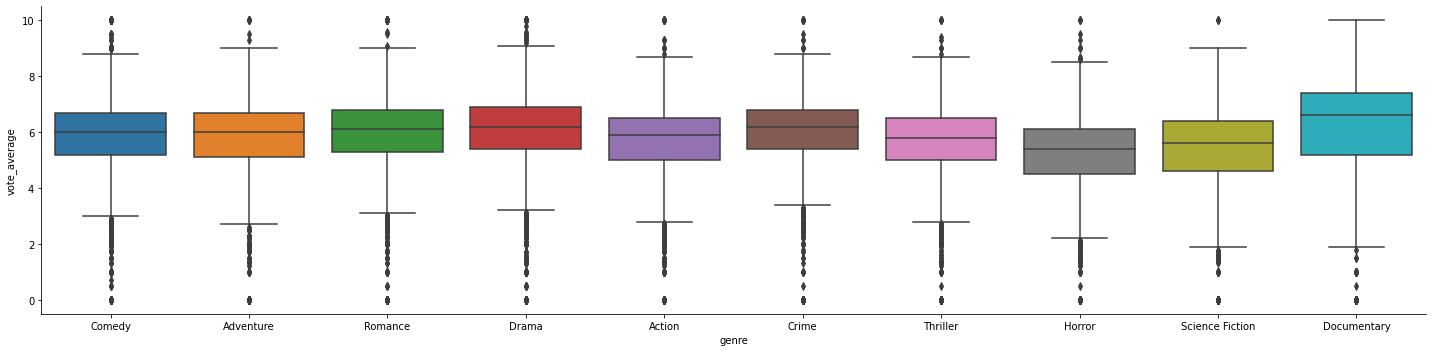

In [21]:
movies_in_top_genres = movies_genres[movies_genres['genre'].isin(top_genres[:10])]
sns.catplot(x="genre", y="vote_average", data=movies_in_top_genres, kind='box', height=5, aspect=4)
plt.show()

In [22]:
ratings = pd.read_csv('movies-dataset/ratings.csv')
links = pd.read_csv('movies-dataset/links.csv')
ratings = ratings.merge(links, on='movieId')
ratings = ratings.dropna()
ratings['tmdbId'] = ratings['tmdbId'].astype(int)

In [23]:
ratings.head()

,userId,movieId,rating,timestamp,imdbId,tmdbId
0,1,110,1.0,1425941529,112573,197
1,11,110,3.5,1231676989,112573,197
2,22,110,5.0,1111937009,112573,197
3,24,110,5.0,979870012,112573,197
4,29,110,3.0,1044020005,112573,197


In [24]:
top_movies = movies_metadata.nlargest(10, 'revenue')

In [25]:
top_movies_ratings = top_movies.merge(ratings, left_on='id', right_on='tmdbId')

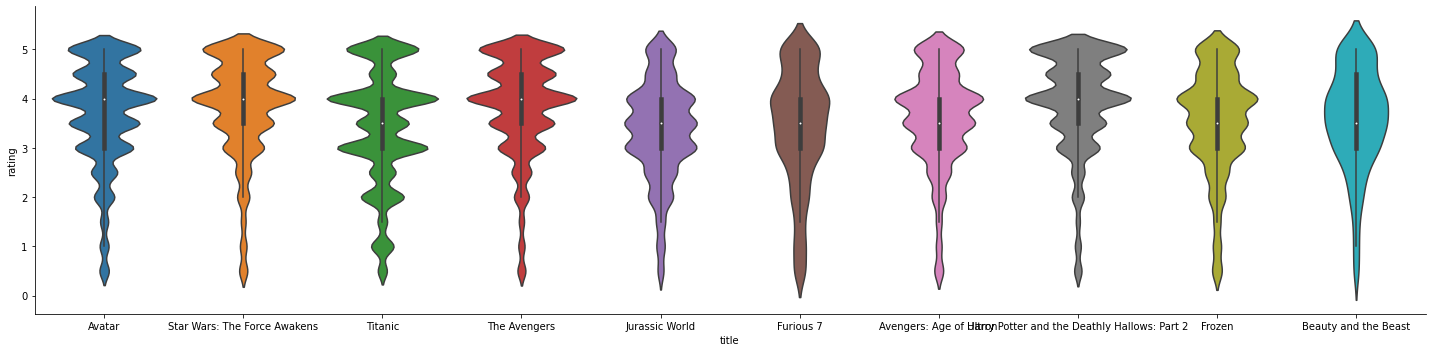

In [26]:
sns.catplot(x='title', y='rating', data=top_movies_ratings, kind='violin', height=5, aspect=4)

In [27]:
rating_stds = ratings.groupby('tmdbId')['rating'].std().dropna()
a=rating_stds.reset_index(name='tmdbId')
# a.index.name = 'tmdbId'
a
# controversial_movies = rating_stds.nlargest(10)

ValueError: cannot insert tmdbId, already exists

In [ ]:
rating_stds.nlargest(10, columns=['rating'])['tmdbId']

In [ ]:
movies_metadata[movies_metadata['id'].isin(controversial_movies['tmdbId'])]

<AxesSubplot:>

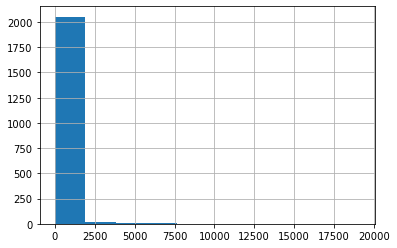

In [36]:
ratings.groupby('userId')['movieId'].count().value_counts().hist()

In [46]:
ratings_count = ratings.groupby('userId')['movieId'].count()
print(f'{ratings.shape[0]:,} ratings')
print(f'{ratings["userId"].unique().size:,} users')


for i in [25, 50, 100, 200]:
    users_with_r = ratings_count[ratings_count >= i]
    print(f'{users_with_r.shape[0]:,} users with over {i} votes')


26,010,786 ratings
270,888 users
148,749 users with over 25 votes
103,787 users with over 50 votes
64,379 users with over 100 votes
33,065 users with over 200 votes
